In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dadosTextosCientificos.tsv


In [9]:
df = pd.read_csv('/kaggle/input/dadosTextosCientificos.tsv',
                   sep='\t',
                   engine='python',
                   encoding='latin-1')

In [10]:
df

,Título_Público,Descricao_pública
0,Açúcar de frutas e aplicação em bolos como sub...,O uso de inovações tecnológicas auxilia as ind...
1,Desenvolver uma linha de farofas com castanhas...,O uso de inovações tecnológicas auxilia as ind...
2,Desenvolvimento de cobertura líquida para sorvete,O Brasil é considerado um país com a maior bio...
3,Desenvolvimento de conserva de tomate cereja,O Brasil é considerado o país com maior biodiv...
4,Desenvolvimento de massa alimentícia enriqueci...,Nos últimos anos a comunidade científica tem d...
...,...,...
2720,Desenvolvimento de ativos biotecnológicos para...,O avanço das tecnologias para estudos genômico...
2721,SIMA MV POWER,Projeto de PD&I para desenvolvimento de um sis...
2722,Talhonameno Ótimo Klabin,"A Klabin S/A é uma empresa brasileira, de cará..."
2723,Tecnologia de Quantificação de Estoque de Carb...,Com a execução do presente projeto espera-se d...


In [11]:
texto = df.iloc[1, 1]
texto

'O uso de inovações tecnológicas auxilia as indústrias a desenvolverem modelos sustentáveis de produção, destaca-se a necessidade de pesquisas com o objetivo de desenvolver produto inovador pronto para consumo, agregação de valor e diferenciação de sabores, em especial produtos oriundos das florestas brasileiras que contribuem para o desenvolvimento da bioeconomia no Brasil.  Esse estudo também se propõe a avaliar as características do novo produto para fins de informação nutricional da rotulagem e acompanhar o período de vida útil do produto. A empresa está em busca de apoio na inovação e melhoria dos processos para desenvolver uma linha de produção sustentável com o uso de castanhas brasileiras, devido a grande diversidade dessas castanhas com alto valor nutricional e com sabor, aroma e alto nível de aceitação ampliando a diversificação de produtos.'

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import RSLPStemmer

In [13]:
# Criar um diretório específico para armazenar os recursos do nltk
nltk_data_dir = '/kaggle/working/nltk_data'
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

# Adicionar o diretório ao caminho de busca do nltk
nltk.data.path.append(nltk_data_dir)

In [14]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/kaggle/working/nltk_data']


In [15]:
# Baixar recursos necessários
nltk.download('wordnet', download_dir=nltk_data_dir)
nltk.download('omw-1.4', download_dir=nltk_data_dir)  # Suporte multilíngue
nltk.download('punkt', download_dir=nltk_data_dir)  # Para tokenização
nltk.download('stopwords', download_dir=nltk_data_dir)  # Para stopwords
nltk.download('rslp', download_dir=nltk_data_dir)  # Stemmer para português

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package punkt to /kaggle/working/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /kaggle/working/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [16]:
# Verifique os arquivos baixados
!ls /kaggle/working/nltk_data/corpora

omw-1.4.zip  stopwords	stopwords.zip  wordnet.zip


In [17]:
import zipfile
import os

# Caminho para o arquivo baixado
wordnet_zip_path = '/kaggle/working/nltk_data/corpora/wordnet.zip'
extract_path = '/kaggle/working/nltk_data/corpora/'

omw_zip_path = '/kaggle/working/nltk_data/corpora/omw-1.4.zip'
omw_extract_path = '/kaggle/working/nltk_data/omw-1.4/'

# Extraindo o conteúdo do arquivo zip
with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
# Extraindo o conteúdo do arquivo zip
with zipfile.ZipFile(omw_zip_path, 'r') as zip_ref:
    zip_ref.extractall(omw_extract_path)

In [18]:
# Verifique se os arquivos foram extraídos corretamente
!ls /kaggle/working/nltk_data/corpora/wordnet

LICENSE  adv.exc       data.adj   data.verb  index.noun   lexnames
README	 citation.bib  data.adv   index.adj  index.sense  noun.exc
adj.exc  cntlist.rev   data.noun  index.adv  index.verb   verb.exc


In [19]:
# Carregar stopwords em português
stopwords_nltk = set(stopwords.words('portuguese'))

# Exibir as stopwords em português
print(stopwords_nltk)
print(f"Total de Stopwords: {len(stopwords_nltk)}")

{'seus', 'sua', 'dele', 'foi', 'também', 'tinham', 'hei', 'teria', 'fomos', 'se', 'como', 'nossos', 'terei', 'tiver', 'você', 'tivera', 'houvemos', 'havemos', 'na', 'ao', 'a', 'ser', 'hajamos', 'tive', 'estejamos', 'eram', 'estejam', 'num', 'um', 'era', 'aquelas', 'forem', 'estive', 'somos', 'sou', 'houveríamos', 'em', 'tenho', 'esses', 'houvéramos', 'fôramos', 'numa', 'estas', 'este', 'muito', 'de', 'que', 'fui', 'no', 'aos', 'seríamos', 'temos', 'delas', 'formos', 'nos', 'mas', 'lhes', 'fossem', 'sejamos', 'houverei', 'os', 'hão', 'vocês', 'e', 'será', 'teremos', 'vos', 'tem', 'teve', 'fôssemos', 'por', 'quem', 'seu', 'dela', 'estiveram', 'houveram', 'estivesse', 'haja', 'houvera', 'tua', 'estivera', 'pelos', 'deles', 'hajam', 'tiveram', 'há', 'estar', 'haver', 'tiverem', 'o', 'pela', 'com', 'dos', 'estivemos', 'eu', 'nós', 'essa', 'tenham', 'houve', 'houvessem', 'teríamos', 'à', 'só', 'sem', 'serão', 'essas', 'estes', 'isso', 'tivessem', 'aquilo', 'tu', 'mesmo', 'estiver', 'são', 's

In [20]:
import string

In [21]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))
pontuacoes = string.punctuation

def normalizar_texto(texto):
    # Converter o texto para minúsculas
    texto = texto.lower()
    
    # Remover pontuação
    texto = ''.join([char for char in texto if char not in pontuacoes])
    
    # Tokenizar o texto
    tokens = word_tokenize(texto)
    
    # Remover stopwords e lematizar
    tokens_normalizados = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return tokens_normalizados

texto_normalizado = normalizar_texto(texto)

print("Texto original:", texto)
print("Texto normalizado:", texto_normalizado)

Texto original: O uso de inovações tecnológicas auxilia as indústrias a desenvolverem modelos sustentáveis de produção, destaca-se a necessidade de pesquisas com o objetivo de desenvolver produto inovador pronto para consumo, agregação de valor e diferenciação de sabores, em especial produtos oriundos das florestas brasileiras que contribuem para o desenvolvimento da bioeconomia no Brasil.  Esse estudo também se propõe a avaliar as características do novo produto para fins de informação nutricional da rotulagem e acompanhar o período de vida útil do produto. A empresa está em busca de apoio na inovação e melhoria dos processos para desenvolver uma linha de produção sustentável com o uso de castanhas brasileiras, devido a grande diversidade dessas castanhas com alto valor nutricional e com sabor, aroma e alto nível de aceitação ampliando a diversificação de produtos.
Texto normalizado: ['uso', 'inovações', 'tecnológicas', 'auxilia', 'indústrias', 'desenvolverem', 'modelos', 'sustentávei

In [22]:
# Inicializar o stemmer para português
stemmer = RSLPStemmer()

# Stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Tokenizar o texto
tokens = word_tokenize(texto)

# Aplicar stemização, ignorando stopwords
tokens_stemmizados = [stemmer.stem(token) for token in tokens if token not in stop_words]

print("Texto original:", texto)
print("Texto stemmizado:", tokens_stemmizados)

Texto original: O uso de inovações tecnológicas auxilia as indústrias a desenvolverem modelos sustentáveis de produção, destaca-se a necessidade de pesquisas com o objetivo de desenvolver produto inovador pronto para consumo, agregação de valor e diferenciação de sabores, em especial produtos oriundos das florestas brasileiras que contribuem para o desenvolvimento da bioeconomia no Brasil.  Esse estudo também se propõe a avaliar as características do novo produto para fins de informação nutricional da rotulagem e acompanhar o período de vida útil do produto. A empresa está em busca de apoio na inovação e melhoria dos processos para desenvolver uma linha de produção sustentável com o uso de castanhas brasileiras, devido a grande diversidade dessas castanhas com alto valor nutricional e com sabor, aroma e alto nível de aceitação ampliando a diversificação de produtos.
Texto stemmizado: ['o', 'uso', 'inov', 'tecnológ', 'auxil', 'indústr', 'desenvolv', 'model', 'sustent', 'produç', ',', 'd

In [23]:
!python -m spacy download pt_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 25.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_md')


In [24]:
import spacy

# Carregar o modelo de português do SpaCy
nlp = spacy.load("pt_core_news_md")

# Acessar a lista de stopwords
stopwords_spacy = nlp.Defaults.stop_words

# Exibir algumas stopwords
print(f"Total de Stopwords: {len(stopwords_spacy)}")
print(f"Algumas Stopwords: {list(stopwords_spacy)[:10]}")

Total de Stopwords: 416
Algumas Stopwords: ['duas', 'seus', 'sua', 'vai', 'és', 'faz', 'tarde', 'também', 'quinta', 'questão']


In [34]:
print(df.columns)

Index(['Título_Público', 'Descricao_pública', 'Cluster'], dtype='object')


In [30]:
# Converter todos os valores para string e tratar valores nulos
df['Descricao_pública'] = df['Descricao_pública'].fillna('').astype(str)

In [32]:
# Tokenizar e normalizar os textos
textos_normalizados = [' '.join(normalizar_texto(texto)) for texto in df['Descricao_pública']]

In [35]:
# Converter valores para strings e tratar NaN
df['Descricao_pública'] = df['Descricao_pública'].fillna('').astype(str)

# Normalizar os textos
textos_normalizados = [' '.join(normalizar_texto(texto)) for texto in df['Descricao_pública']]

# Aplicar TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(textos_normalizados)

# Aplicar KMeans para clusterização
from sklearn.cluster import KMeans

# Definir o número de clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Adicionar os rótulos dos clusters ao DataFrame
df['Cluster'] = kmeans.labels_

# Visualizar os clusters
print(df[['Título_Público', 'Descricao_pública', 'Cluster']].head())

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                      Título_Público  \
0  Açúcar de frutas e aplicação em bolos como sub...   
1  Desenvolver uma linha de farofas com castanhas...   
2  Desenvolvimento de cobertura líquida para sorvete   
3       Desenvolvimento de conserva de tomate cereja   
4  Desenvolvimento de massa alimentícia enriqueci...   

                                   Descricao_pública  Cluster  
0  O uso de inovações tecnológicas auxilia as ind...        4  
1  O uso de inovações tecnológicas auxilia as ind...        4  
2  O Brasil é considerado um país com a maior bio...        0  
3  O Brasil é considerado o país com maior biodiv...        4  
4  Nos últimos anos a comunidade científica tem d...        4  


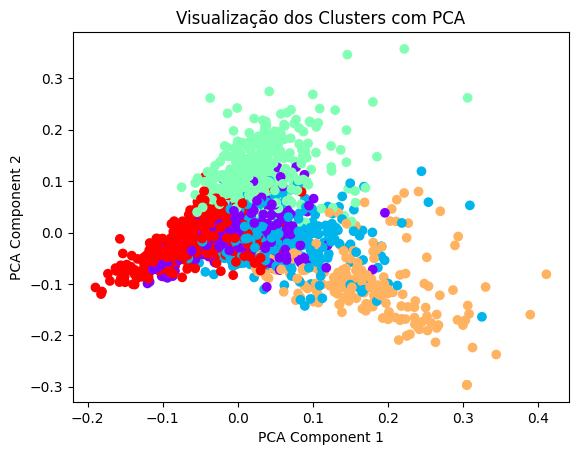

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plotando os clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualização dos Clusters com PCA')
plt.show()